## import libraries

In [131]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.tree import DecisionTreeClassifier

In [132]:
df=pd.read_csv("insurance.csv")
df

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1
...,...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1,10600.54830,0
1334,18,0,31.920,0,0,0,2205.98080,1
1335,18,0,36.850,0,0,2,1629.83350,1
1336,21,0,25.800,0,0,3,2007.94500,0


In [133]:
df.head()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1


In [134]:
df.isnull()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
1333,False,False,False,False,False,False,False,False
1334,False,False,False,False,False,False,False,False
1335,False,False,False,False,False,False,False,False
1336,False,False,False,False,False,False,False,False


In [135]:
df.isnull().sum()

age               0
sex               0
bmi               0
children          0
smoker            0
region            0
charges           0
insuranceclaim    0
dtype: int64

In [136]:
df.corr()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
age,1.000000,-0.020856,0.109272,0.042469,-0.025019,0.002127,0.299008,0.113723
sex,-0.020856,1.000000,0.046371,0.017163,0.076185,0.004588,0.057292,0.031565
bmi,0.109272,0.046371,1.000000,0.012759,0.003750,0.157566,0.198341,0.384198
children,0.042469,0.017163,0.012759,1.000000,0.007673,0.016569,0.067998,-0.409526
smoker,-0.025019,0.076185,0.003750,0.007673,1.000000,-0.002181,0.787251,0.333261
region,0.002127,0.004588,0.157566,0.016569,-0.002181,1.000000,-0.006208,0.020891
charges,0.299008,0.057292,0.198341,0.067998,0.787251,-0.006208,1.000000,0.309418
insuranceclaim,0.113723,0.031565,0.384198,-0.409526,0.333261,0.020891,0.309418,1.000000


In [137]:
df.describe

<bound method NDFrame.describe of       age  sex     bmi  children  smoker  region      charges  insuranceclaim
0      19    0  27.900         0       1       3  16884.92400               1
1      18    1  33.770         1       0       2   1725.55230               1
2      28    1  33.000         3       0       2   4449.46200               0
3      33    1  22.705         0       0       1  21984.47061               0
4      32    1  28.880         0       0       1   3866.85520               1
...   ...  ...     ...       ...     ...     ...          ...             ...
1333   50    1  30.970         3       0       1  10600.54830               0
1334   18    0  31.920         0       0       0   2205.98080               1
1335   18    0  36.850         0       0       2   1629.83350               1
1336   21    0  25.800         0       0       3   2007.94500               0
1337   61    0  29.070         0       1       1  29141.36030               1

[1338 rows x 8 columns]>

In [138]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             1338 non-null   int64  
 1   sex             1338 non-null   int64  
 2   bmi             1338 non-null   float64
 3   children        1338 non-null   int64  
 4   smoker          1338 non-null   int64  
 5   region          1338 non-null   int64  
 6   charges         1338 non-null   float64
 7   insuranceclaim  1338 non-null   int64  
dtypes: float64(2), int64(6)
memory usage: 83.8 KB


In [139]:
df.shape

(1338, 8)

In [140]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges',
       'insuranceclaim'],
      dtype='object')

In [141]:
df['age'].value_counts()

18    69
19    68
50    29
51    29
47    29
46    29
45    29
20    29
48    29
52    29
22    28
49    28
54    28
53    28
21    28
26    28
24    28
25    28
28    28
27    28
23    28
43    27
29    27
30    27
41    27
42    27
44    27
31    27
40    27
32    26
33    26
56    26
34    26
55    26
57    26
37    25
59    25
58    25
36    25
38    25
35    25
39    25
61    23
60    23
63    23
62    23
64    22
Name: age, dtype: int64

In [142]:
df['sex'].value_counts()

1    676
0    662
Name: sex, dtype: int64

In [143]:
df['bmi'].value_counts()

32.300    13
28.310     9
30.495     8
30.875     8
31.350     8
          ..
46.200     1
23.800     1
44.770     1
32.120     1
30.970     1
Name: bmi, Length: 548, dtype: int64

In [144]:
df[ 'children'].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

In [145]:
df['charges'].value_counts()

1639.56310     2
16884.92400    1
29330.98315    1
2221.56445     1
19798.05455    1
              ..
7345.08400     1
26109.32905    1
28287.89766    1
1149.39590     1
29141.36030    1
Name: charges, Length: 1337, dtype: int64

In [146]:
df[ 'smoker'].value_counts()

0    1064
1     274
Name: smoker, dtype: int64

In [147]:
df['insuranceclaim'].value_counts()

1    783
0    555
Name: insuranceclaim, dtype: int64

In [148]:
#X==df.iloc[:,:-1].values
#y==df.iloc[:,:-1].values

In [149]:
X = df['age']
y = df['insuranceclaim']

## EDA

## Data visualisation

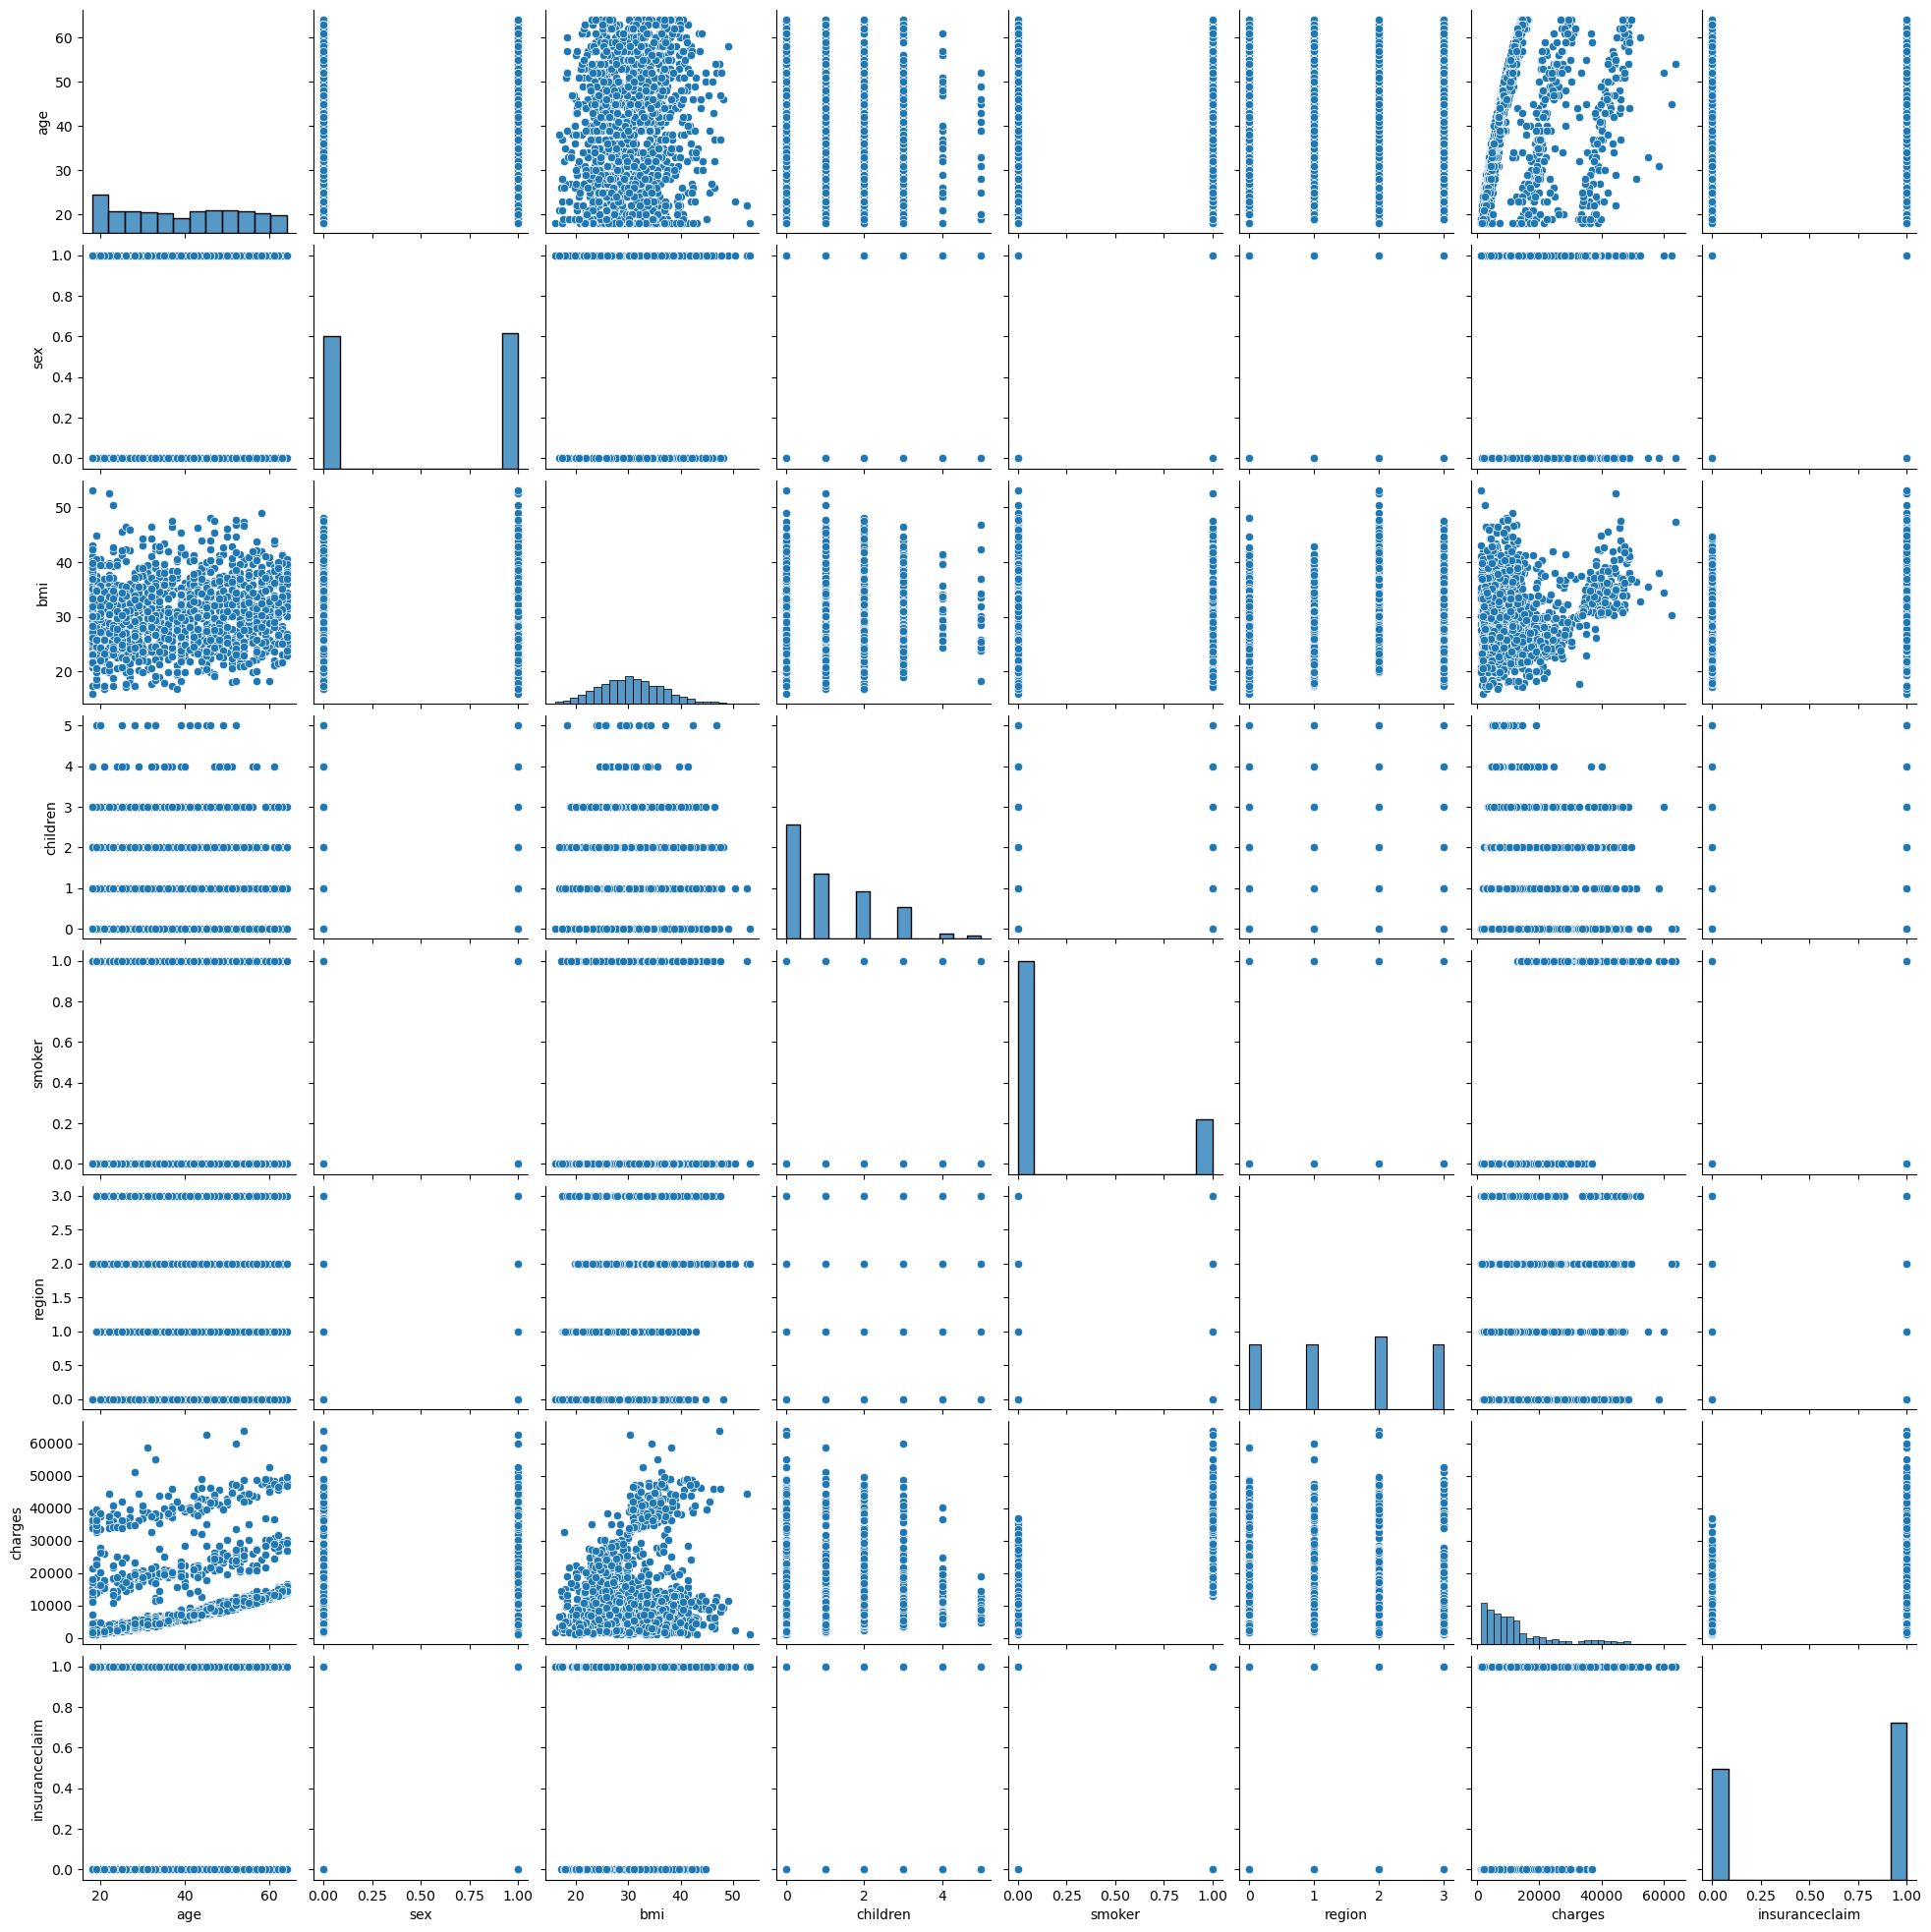

In [22]:
sns.pairplot(df)

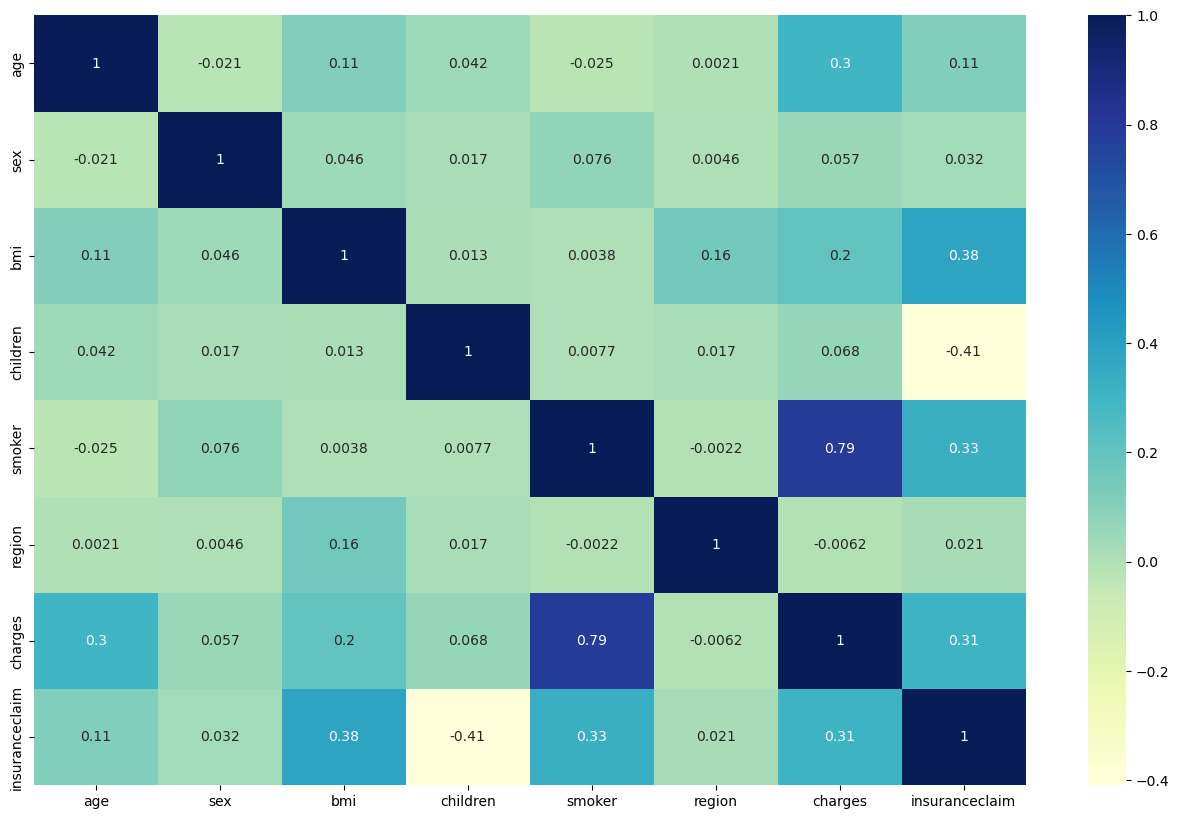

In [23]:
plt.figure(figsize = (16, 10))
sns.heatmap(df.corr(), annot = True, cmap="YlGnBu")
plt.show()

In [24]:
plt.title("Class Distribution")
df.groupby("insuranceclaim").size().plot(kind='pie',autopct='%.2f',figsize=(10,8))

<AxesSubplot:title={'center':'Class Distribution'}, ylabel='None'>

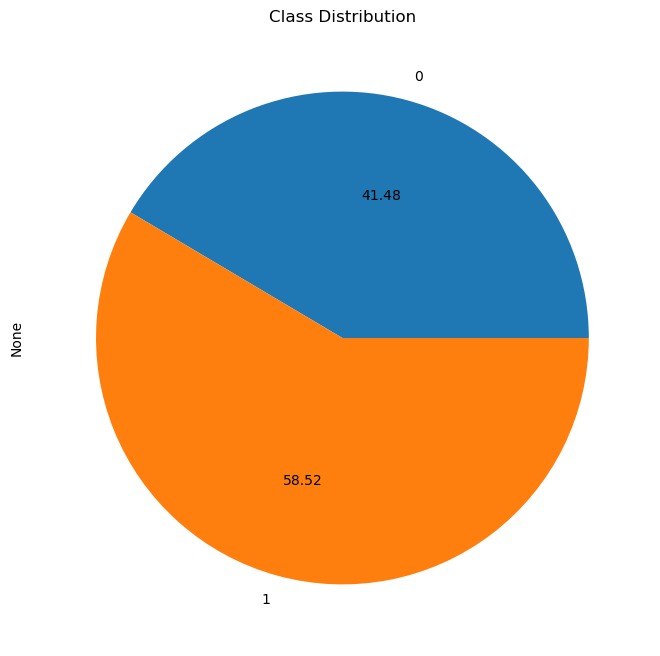

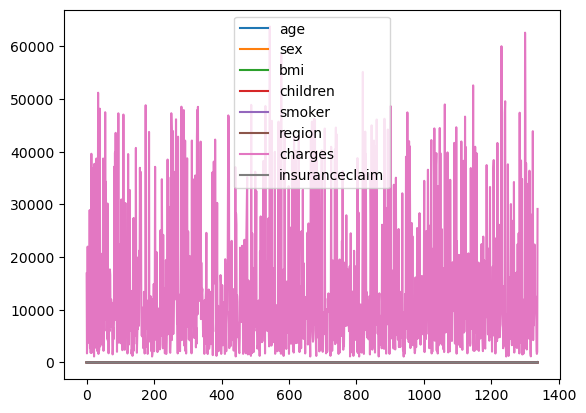

In [25]:
df[['age','sex','bmi','children', 'smoker', 'region', 'charges','insuranceclaim']].plot.line()
plt.show()

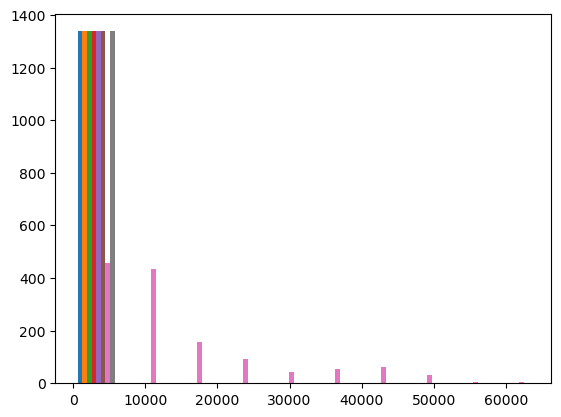

In [26]:

plt.hist(df)
plt.show()

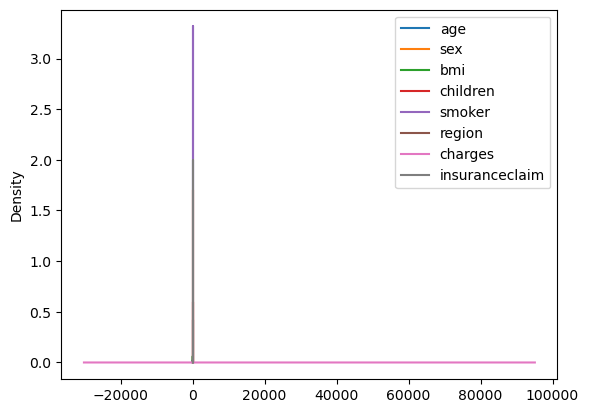

In [27]:
df[['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges','insuranceclaim']].plot.kde()
plt.show()

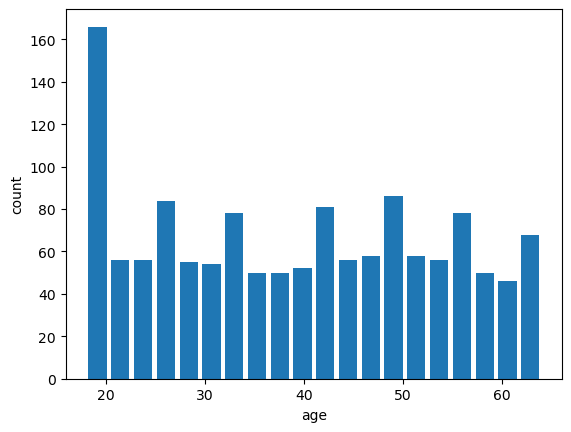

In [28]:
plt.hist(df["age"],bins=20,rwidth=0.8)
plt.xlabel('age')
plt.ylabel('count')
plt.show()

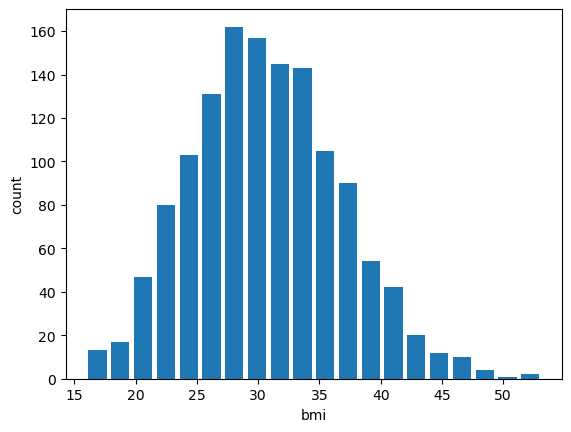

In [29]:
plt.hist(df["bmi"],bins=20,rwidth=0.8)
plt.xlabel('bmi')
plt.ylabel('count')
plt.show()

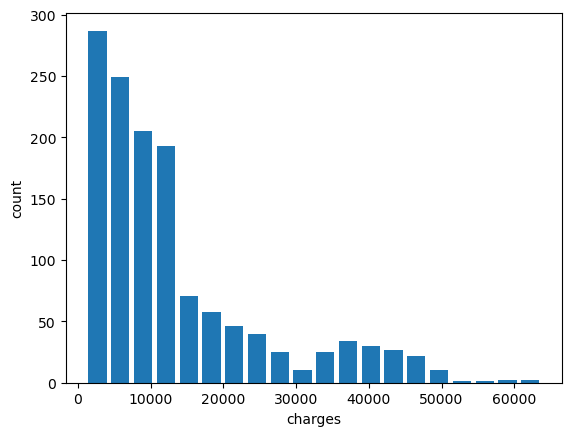

In [30]:
plt.hist(df["charges"],bins=20,rwidth=0.8)
plt.xlabel('charges')
plt.ylabel('count')
plt.show()

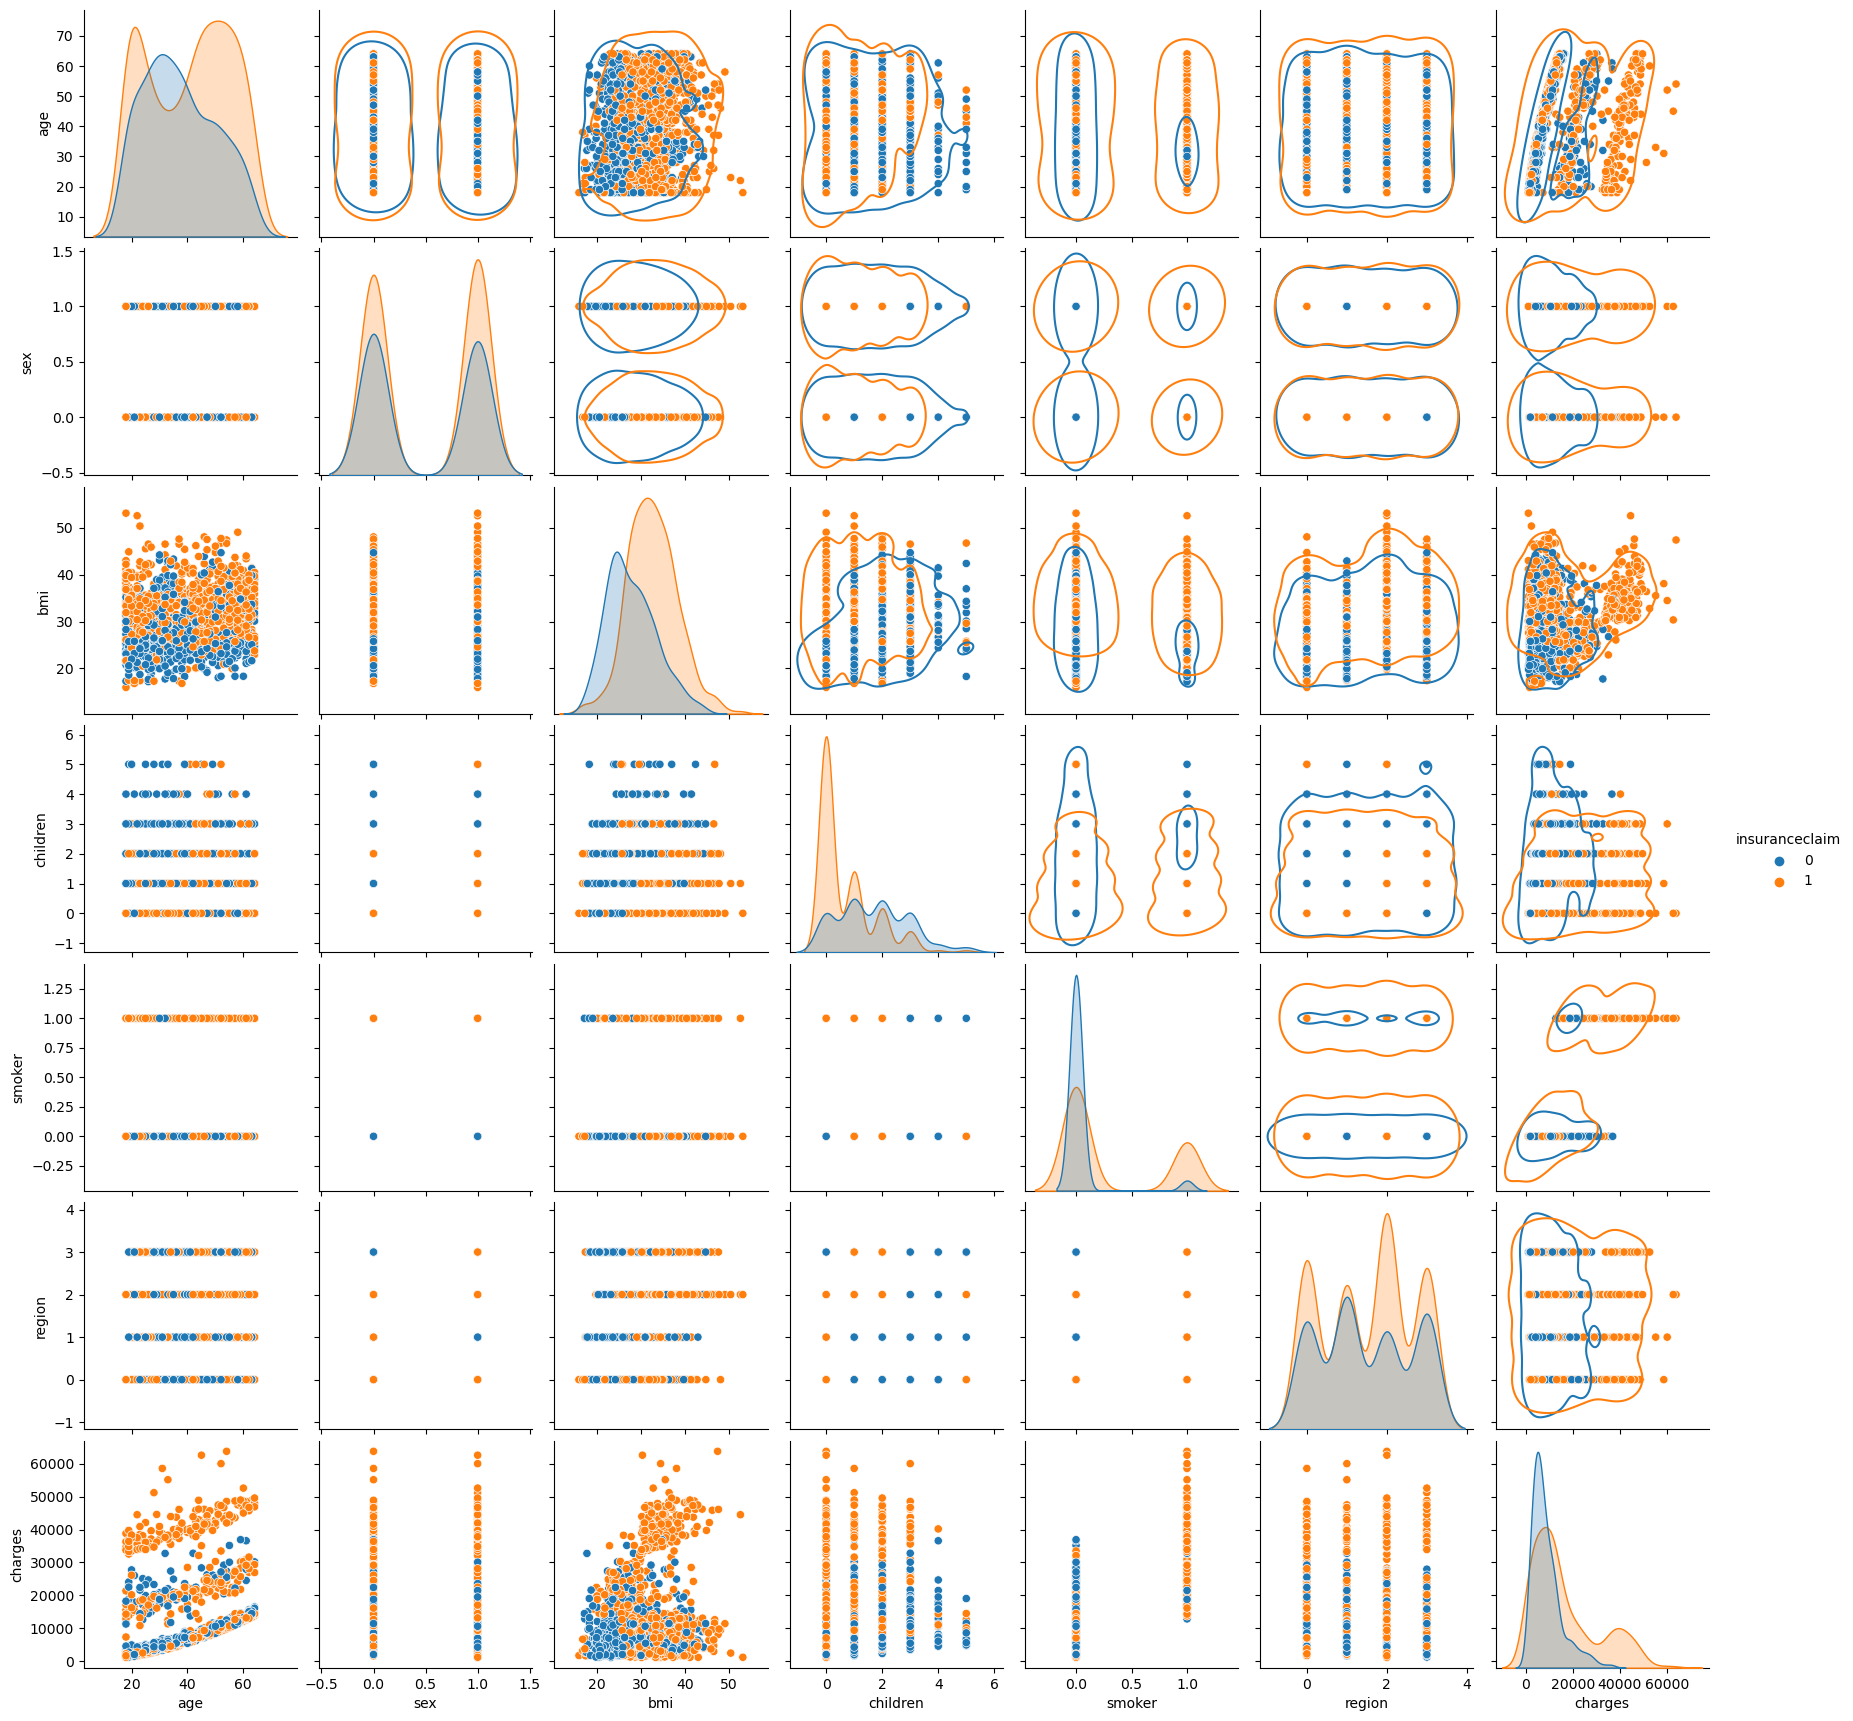

In [31]:
g=sns.pairplot(df,hue='insuranceclaim')
g.map_upper(sns.kdeplot, levels=1, color=".2")
plt.show()

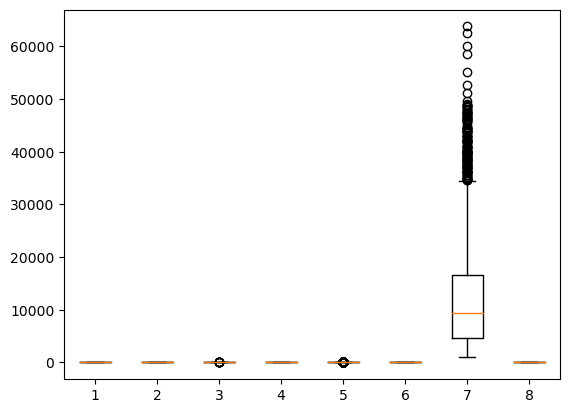

In [32]:
plt.boxplot(df[['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges','insuranceclaim']])
plt.show()

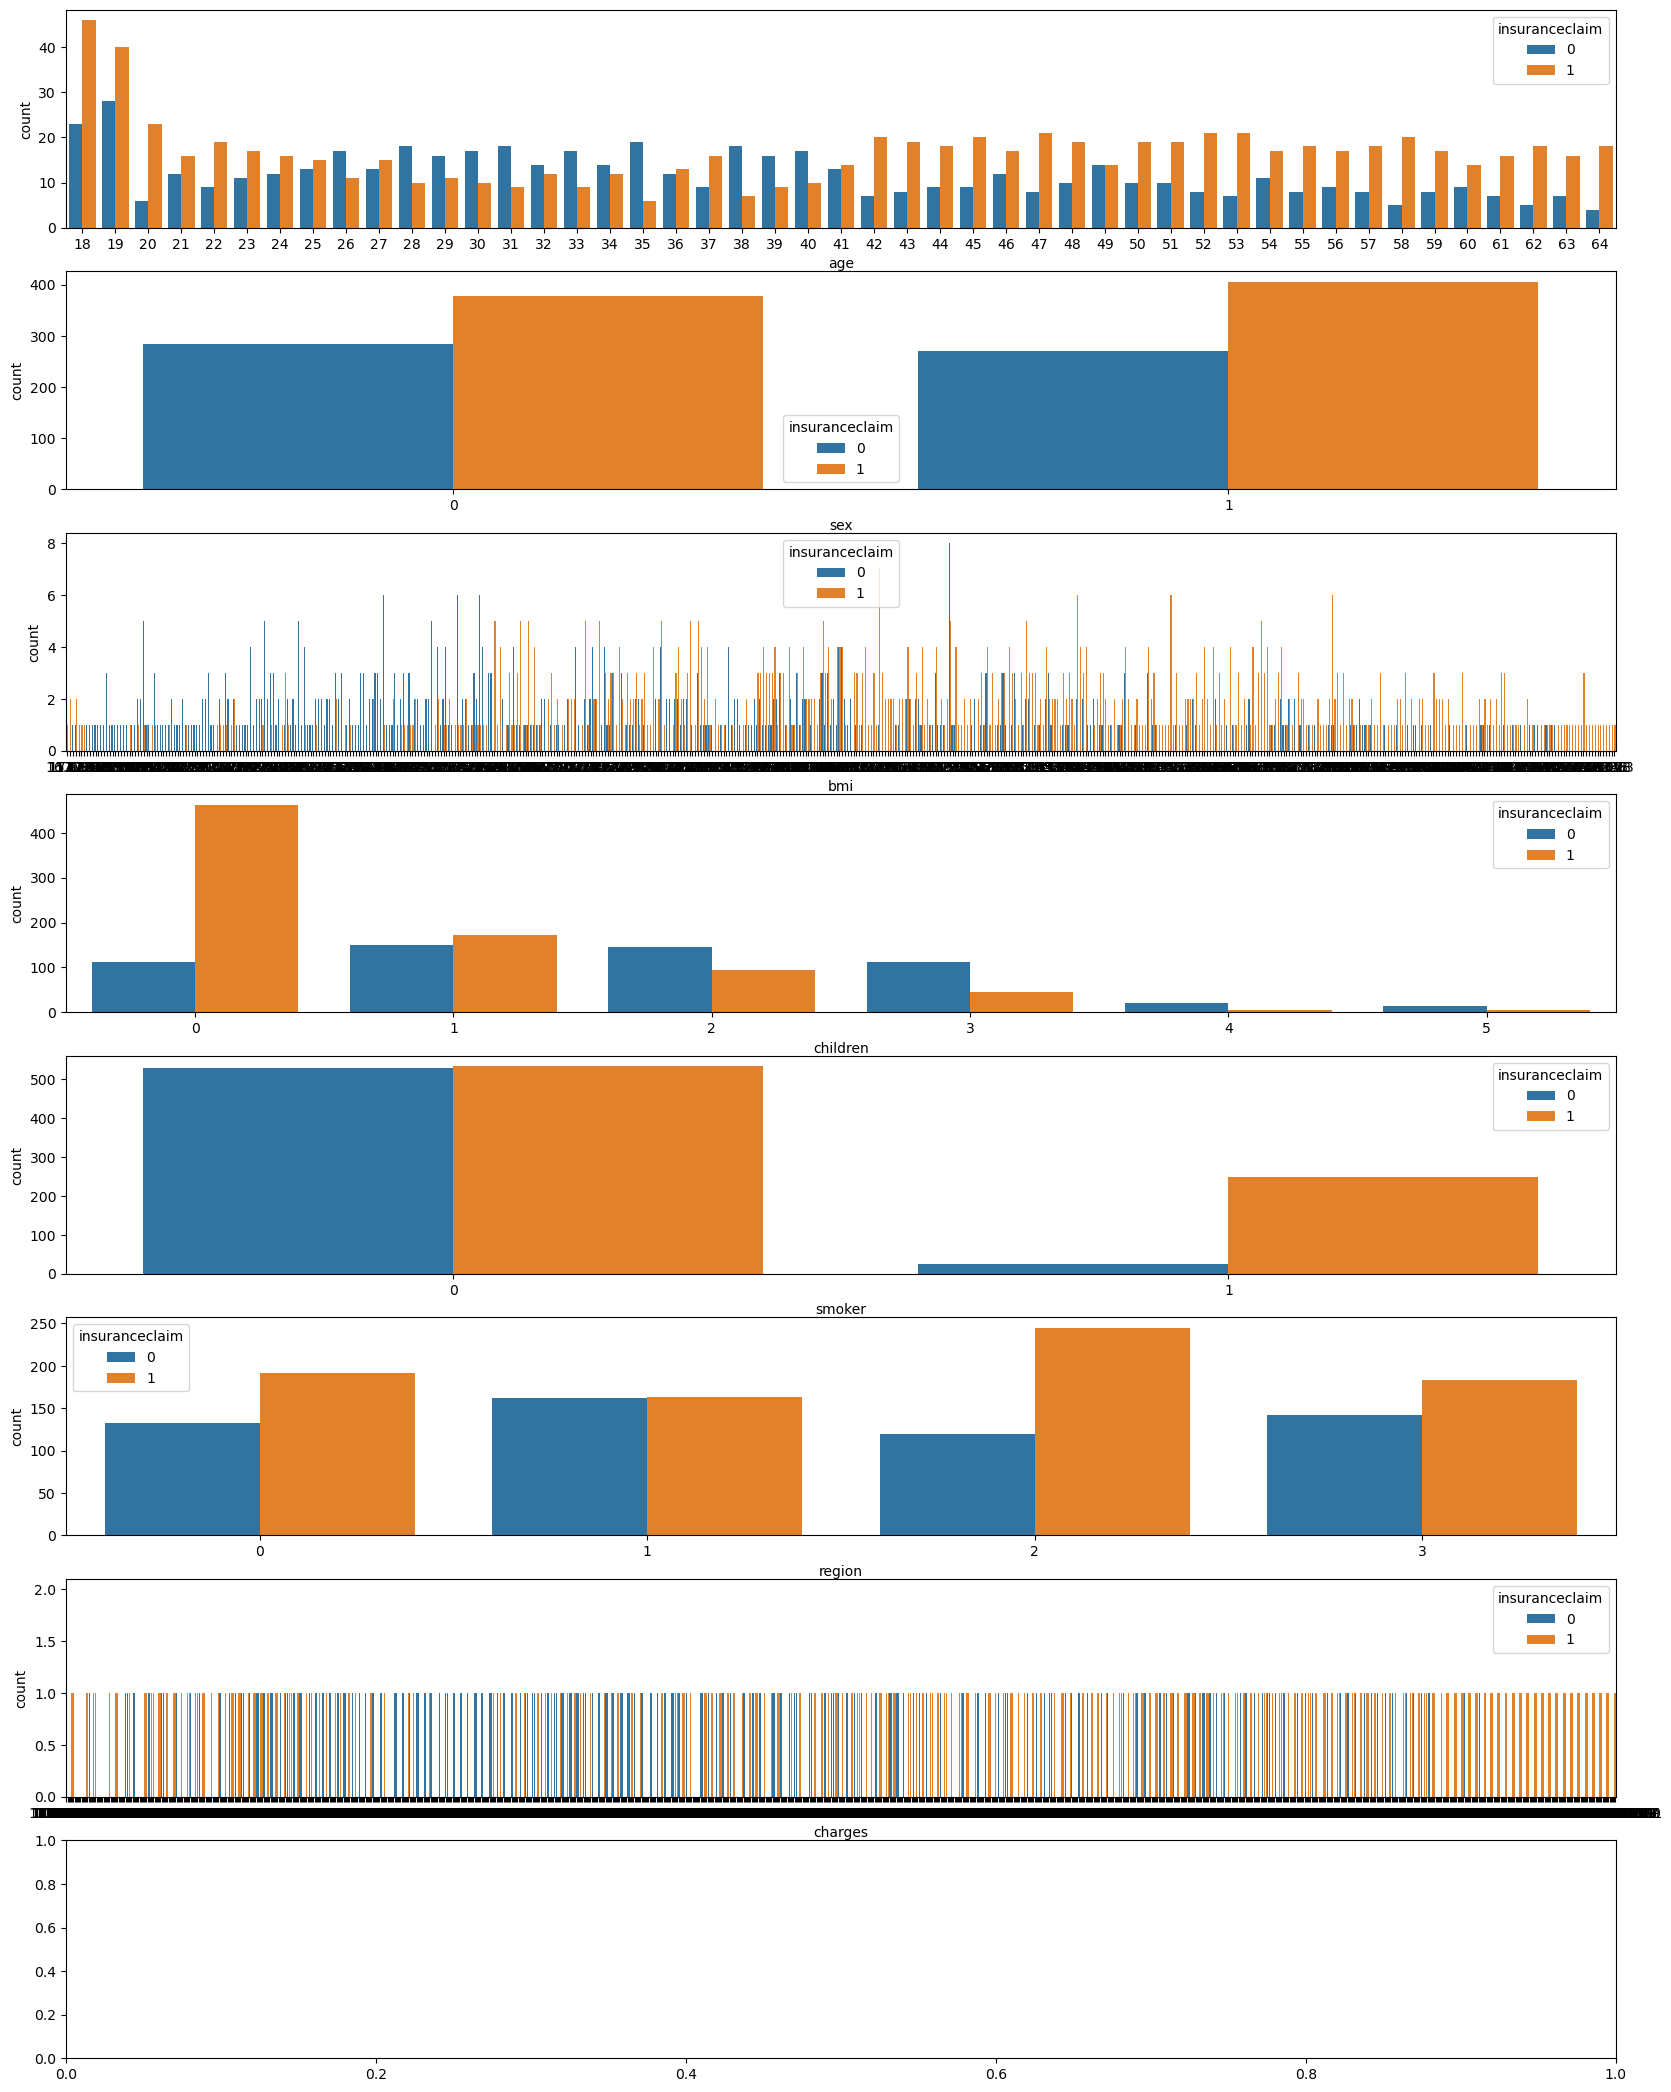

In [33]:
plt.figure(figsize=(20, 30))
plt.subplot(9,1,1)
sns.countplot(x = 'age', hue = 'insuranceclaim', data = df)
plt.subplot(9,1,2)
sns.countplot(x = 'sex', hue = 'insuranceclaim', data = df)
plt.subplot(9,1,3)
sns.countplot(x = 'bmi', hue = 'insuranceclaim', data = df)
plt.subplot(9,1,4)
sns.countplot(x = 'children', hue = 'insuranceclaim', data = df)
plt.subplot(9,1,5)
sns.countplot(x = 'smoker', hue = 'insuranceclaim', data = df)
plt.subplot(9,1,6)
sns.countplot(x = 'region', hue = 'insuranceclaim', data = df)
plt.subplot(9,1,7)
sns.countplot(x = 'charges', hue = 'insuranceclaim', data = df)
plt.subplot(9,1,8)
plt.show()

## standard scaling

In [150]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=24)

In [151]:
print("X_train : ",X_train.shape)
print("X_test : ",X_test.shape)
print("y_train : ",y_train.shape)
print("y_test : ",y_test.shape)

X_train :  (1070,)
X_test :  (268,)
y_train :  (1070,)
y_test :  (268,)


In [152]:
X_train = X_train.values.reshape(X_train.shape[0],1)
X_test = X_test.values.reshape(X_test.shape[0],1)
y_train = y_train.values.reshape(y_train.shape[0],1)
y_test = y_test.values.reshape(y_test.shape[0],1)

In [153]:
print("X_train : ",X_train.shape)
print("X_test : ",X_test.shape)
print("y_train : ",y_train.shape)
print("y_test : ",y_test.shape)

X_train :  (1070, 1)
X_test :  (268, 1)
y_train :  (1070, 1)
y_test :  (268, 1)


## Modelling

## Logistic regression

In [154]:
lr = LogisticRegression()
lr.fit(X_train,y_train)

C:\Users\Shree\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [155]:
y_pred = lr.predict(X_test)
y_pred

array([1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1], dtype=int64)

In [156]:
accuracy = lr.score(X_test,y_test)

In [157]:
accuracy

0.5111940298507462

## Testing

In [163]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
print(cm)

[[  6  93]
 [ 38 131]]


In [167]:
from sklearn.metrics import classification_report

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.14      0.06      0.08        99
           1       0.58      0.78      0.67       169

    accuracy                           0.51       268
   macro avg       0.36      0.42      0.38       268
weighted avg       0.42      0.51      0.45       268



## Support vector machine

In [169]:
from sklearn.svm import SVR

In [170]:
clf1 = SVC(kernel = 'rbf',random_state = 0)
clf1.fit(X_train,y_train)

C:\Users\Shree\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(random_state=0)

In [171]:
y_pred = clf1.predict(X_test)
y_pred

array([0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0], dtype=int64)

In [172]:

accuracy = accuracy_score(y_test,y_pred)*100
print(accuracy)

67.53731343283582


In [173]:
#confusion metrics

In [174]:
cm = confusion_matrix(y_test,y_pred)
print(cm)

[[ 46  53]
 [ 34 135]]


In [183]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.fit_transform(X_test)

In [184]:
# model
clf1 = SVC(kernel = 'rbf',random_state = 0)
clf1.fit(X_train_scaled,y_train)

C:\Users\Shree\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(random_state=0)

In [185]:
# prediction
y_pred = clf1.predict(X_test)
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1], dtype=int64)

In [186]:
# accuracy after scaling
accuracy1 = accuracy_score(y_test,y_pred)
print(accuracy1)

0.6305970149253731


In [181]:
cm1 = confusion_matrix(y_test,y_pred)
print(cm1)

[[  0  99]
 [  0 169]]


## Decision tree

In [187]:
# Model
dtree = DecisionTreeClassifier(criterion='entropy',max_depth=3)
# fitting
dtree.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [188]:
# predicting
y_pred = dtree.predict(X_train)
#y_pred

In [189]:

y_pred=dtree.predict(X_train)

acc = accuracy_score(y_train,y_pred)
print("Accuracy : ",acc)

Accuracy :  0.6317757009345795


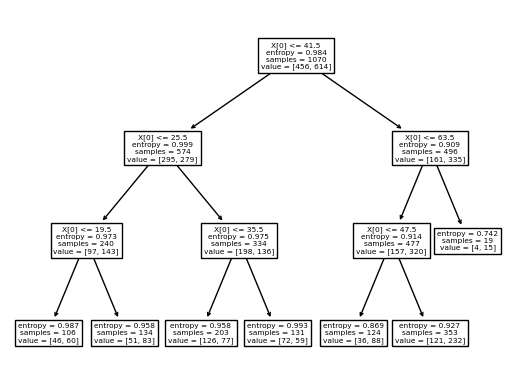

In [190]:
from sklearn import tree
tree.plot_tree(dtree)
plt.show()

## Random forest classifier

In [191]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score

clf1=RandomForestClassifier(random_state=0)
clf1.fit(X_train,y_train)
y_h=clf1.predict(X_train)
print(f1_score(y_train,y_h))

C:\Users\Shree\AppData\Local\Temp\ipykernel_8580\2528416488.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf1.fit(X_train,y_train)


0.732590529247911


In [192]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score

clf1=RandomForestClassifier(random_state=0)
clf1.fit(X_train,y_train)
y_h=clf1.predict(X_train)
print(f1_score(y_train,y_h))

C:\Users\Shree\AppData\Local\Temp\ipykernel_8580\2528416488.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf1.fit(X_train,y_train)


0.732590529247911


## conclusion

In [ ]:
In this project, we have been able to illustrate the use of different machine learning algorithms and in classification algorithm methods in claim prediction.

Although every problem behaves differently, we can conclude that Logistic regression,Decision tree ,Support Vector Machine and Random foorest performs exceptionally well for most classification problems. It would be interesting to see how deep learning models would perform against the classic ensemble methods.